In [1]:
import pandas as pd

In [6]:
columns = ['id','doc','order']
graph_data = pd.read_csv('graph_data.csv',sep=';',encoding='utf-8')
graph_data.columns = columns
graph_data.head()

,id,doc,order
0,5863e60479fd4660b8adf470,регистрация прав недвижимое имущество,2021-08-27 16:19:32
1,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:33
2,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:32
3,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:33
4,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:32


In [92]:
def get_order(str_date):
    start_point = 32
    sec = int(str_date[-2:])
    return sec - start_point

In [ ]:
graph_data['order_int'] = graph_data['order'].apply(get_order)

In [15]:
graph_data.head()

,id,doc,order,order_int
0,5863e60479fd4660b8adf470,регистрация прав недвижимое имущество,2021-08-27 16:19:32,0
1,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:33,1
2,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:32,0
3,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:33,1
4,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:32,0
5,5863e60479fd4660b8adf470,право собственности,2021-08-27 16:19:33,1
6,5863e60479fd4660b8adf470,право собственности,2021-08-27 16:19:32,0
7,5863e60479fd4660b8adf470,регистрация прав недвижимое имущество,2021-08-27 16:19:33,1
8,5863e60479fd4660b8adf470,право собственности,2021-08-27 16:19:32,0
9,5863e60479fd4660b8adf470,паспорт,2021-08-27 16:19:33,1


In [17]:
graph_data_list = graph_data[['id','doc','order_int']].values.tolist()
graph_data_list[0]

['5863e60479fd4660b8adf470', 'регистрация прав недвижимое имущество', 0]

In [55]:
cnt = 0
edges_dict_tmp = {}
edges_dict = {}
for row in graph_data_list:
    if cnt == 0:
        cur_id = row[0]
        edges_dict_tmp[row[2]] = [row[1]]
        cnt += 1
    else:
        new_id = row[0]
        if new_id != cur_id:
            max_key = max(list(edges_dict_tmp.keys()))
            min_key = min(list(edges_dict_tmp.keys()))
            for i in range(min_key,max_key):
                try:
                    for val1 in set(edges_dict_tmp.get(i)):
                        if i == 0:
                                if edges_dict.get(tuple(['start',val1])) is not None:
                                    edges_dict[tuple(['start',val1])] += 1
                                else:
                                    edges_dict[tuple(['start',val1])] = 1
                        for val2 in set(edges_dict_tmp.get(i+1)):
                            if i == max_key-1:
                                if edges_dict.get(tuple([val2,'end'])) is not None:
                                    edges_dict[tuple([val2,'end'])] += 1
                                else:
                                    edges_dict[tuple([val2,'end'])] = 1
                            if (val1 == val2):
                                continue
                            if edges_dict.get(tuple([val1,val2])) is not None:
                                edges_dict[tuple([val1,val2])] += 1
                            else:
                                edges_dict[tuple([val1,val2])] = 1
                except:
                    continue
            edges_dict_tmp = {}
            edges_dict_tmp[row[2]] = [row[1]]
            cur_id = new_id
            continue
        if edges_dict_tmp.get(row[2]) is None:
            edges_dict_tmp[row[2]] = [row[1]]
        else:
            edges_dict_tmp[row[2]].append(row[1])
        cur_id = new_id
    

In [65]:
G = nx.DiGraph()
treshhold = 30
for k,v in edges_dict.items():
    if v > treshhold:
        G.add_edge(k[0],k[1],weight = v)
    

In [70]:
dict(sorted(edges_dict.items(), key=lambda item: item[1],reverse = True))


{('start', 'паспорт'): 675,
 ('паспорт', 'end'): 650,
 ('выписка егрн', 'end'): 610,
 ('кредитный договор', 'end'): 497,
 ('start', 'выписка егрн'): 385,
 ('материнский капитал', 'end'): 304,
 ('паспорт', 'выписка егрн'): 275,
 ('полис страхования', 'end'): 255,
 ('start', 'право собственности'): 244,
 ('право собственности', 'end'): 244,
 ('start', 'кредитный договор'): 233,
 ('start', 'снилс'): 215,
 ('паспорт', 'кредитный договор'): 189,
 ('снилс', 'end'): 188,
 ('start', 'материнский капитал'): 164,
 ('выписка егрн', 'паспорт'): 164,
 ('инн', 'end'): 147,
 ('свидетельство рождении', 'end'): 139,
 ('кредитный договор', 'паспорт'): 136,
 ('start', 'отчет оценка'): 130,
 ('договор купли продажи', 'end'): 123,
 ('start', 'полис страхования'): 122,
 ('выписка егрн', 'право собственности'): 120,
 ('паспорт', 'материнский капитал'): 116,
 ('договор долевого участия', 'end'): 112,
 ('отчет оценка', 'end'): 109,
 ('право собственности', 'выписка егрн'): 108,
 ('материнский капитал', 'паспор

In [74]:
edges_clean = {}
for k,v in edges_dict.items():
    if k[0] != 'start' and k[1] != 'start' and k[0] != 'end' and k[1] != 'end':
        edges_clean[k] = v
print('\n')
dict(sorted(edges_clean.items(), key=lambda item: item[1],reverse = True))

{('паспорт', 'выписка егрн'): 275,
 ('паспорт', 'кредитный договор'): 189,
 ('выписка егрн', 'паспорт'): 164,
 ('кредитный договор', 'паспорт'): 136,
 ('выписка егрн', 'право собственности'): 120,
 ('паспорт', 'материнский капитал'): 116,
 ('право собственности', 'выписка егрн'): 108,
 ('материнский капитал', 'паспорт'): 107,
 ('снилс', 'паспорт'): 106,
 ('паспорт', 'снилс'): 100,
 ('кредитный договор', 'выписка егрн'): 92,
 ('право собственности', 'паспорт'): 90,
 ('паспорт', 'полис страхования'): 90,
 ('выписка егрн', 'кредитный договор'): 84,
 ('выписка егрн', 'материнский капитал'): 81,
 ('паспорт', 'право собственности'): 79,
 ('снилс', 'материнский капитал'): 76,
 ('паспорт', 'свидетельство рождении'): 76,
 ('отчет оценка', 'выписка егрн'): 74,
 ('выписка егрн', 'полис страхования'): 68,
 ('инн', 'кредитный договор'): 68,
 ('выписка егрн', 'отчет оценка'): 67,
 ('снилс', 'кредитный договор'): 66,
 ('право собственности', 'кредитный договор'): 66,
 ('снилс', 'выписка егрн'): 65,
 

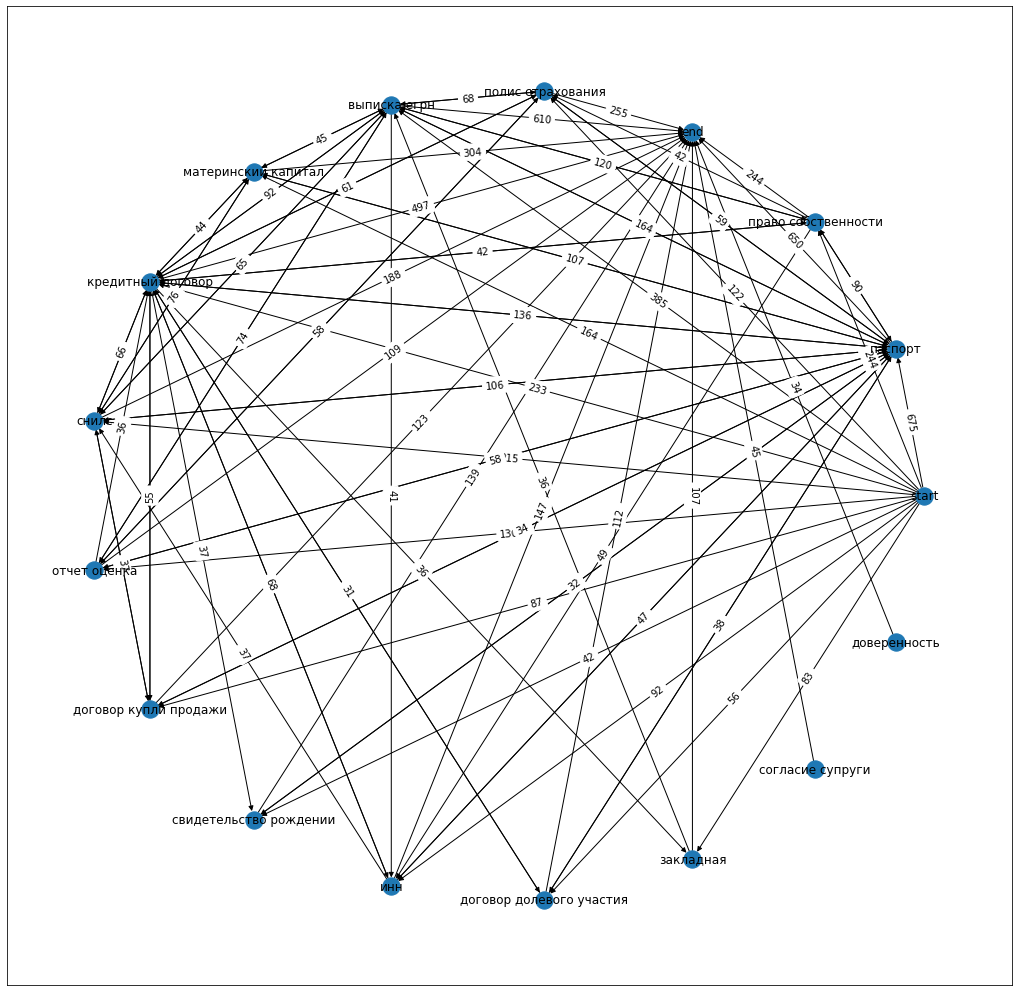

done


In [58]:
import matplotlib.pyplot as plt
pos=nx.circular_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(3,figsize=(18,18)) 
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()            

print('done')

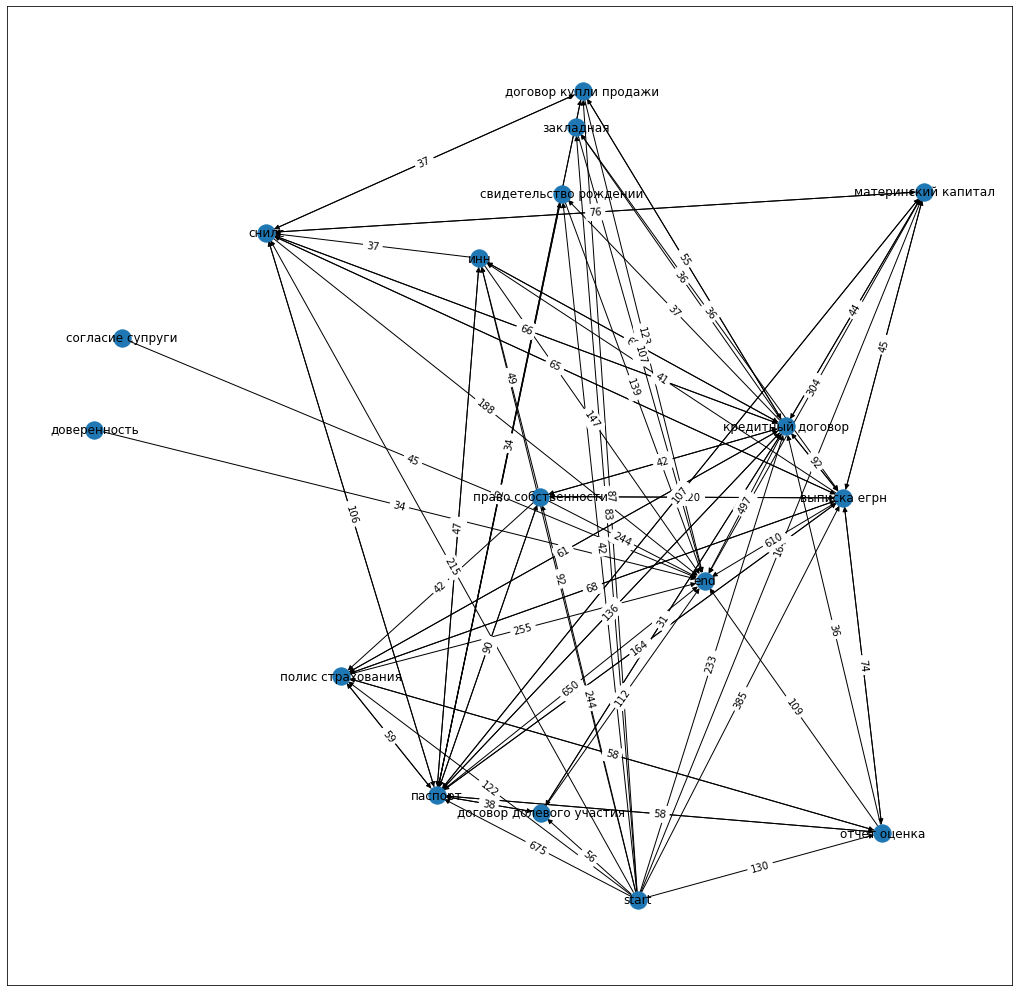

In [69]:
pos=nx.random_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(3,figsize=(18,18)) 
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()  

In [82]:
nodes = []
for el in list(edges_dict.keys()):
    if el[0] not in nodes:
        nodes.append(el[0])
    if el[1] not in nodes:
        nodes.append(el[1])
tgf_nodes = {}
for i in range(len(nodes)):
    tgf_nodes[nodes[i]] = i+1
tgf_nodes   

{'start': 1,
 'паспорт': 2,
 'право собственности': 3,
 'регистрация прав недвижимое имущество': 4,
 'end': 5,
 'полис страхования': 6,
 'выписка егрн': 7,
 'договор дарения': 8,
 'материнский капитал': 9,
 'кредитный договор': 10,
 'снилс': 11,
 'отчет оценка': 12,
 'договор купли продажи': 13,
 'свидетельство рождении': 14,
 'инн': 15,
 'договор долевого участия': 16,
 'закладная': 17,
 'технический паспорт': 18,
 'поэтажный план': 19,
 'брачный договор': 20,
 'доверенность': 21,
 'согласие супруги': 22,
 'реквизиты счета продавца': 23}

In [85]:
res = ''
for k,v in edges_dict.items():
    res += str(tgf_nodes.get(k[0])) + ' ' + str(tgf_nodes.get(k[1])) + ' ' + str(v) + '\n'
res
    

'1 2 675\n2 3 79\n2 4 5\n1 4 14\n4 2 18\n4 3 7\n1 3 244\n3 2 90\n3 4 15\n2 5 650\n2 6 90\n6 7 52\n7 5 610\n6 5 255\n1 7 385\n1 8 3\n8 5 17\n1 9 164\n10 5 497\n9 10 43\n9 2 107\n9 7 45\n9 5 304\n1 11 215\n11 9 76\n2 9 116\n7 9 81\n11 2 106\n2 11 100\n1 12 130\n12 5 109\n1 10 233\n10 12 22\n2 12 50\n3 12 29\n7 2 164\n10 2 136\n13 5 123\n2 13 60\n1 14 42\n14 10 27\n14 2 32\n14 5 139\n15 5 147\n14 15 11\n2 10 189\n2 14 76\n2 15 39\n2 7 275\n1 6 122\n3 8 16\n11 10 66\n7 10 84\n10 9 44\n16 5 112\n9 16 20\n3 5 244\n9 3 24\n11 16 5\n11 3 13\n11 7 65\n2 16 54\n7 16 25\n7 3 120\n6 3 22\n11 5 188\n9 11 36\n7 11 37\n12 7 74\n7 12 67\n7 6 68\n7 17 28\n18 5 9\n2 18 5\n19 5 14\n2 19 4\n3 16 25\n3 18 6\n3 19 6\n7 18 4\n7 19 5\n12 16 8\n12 2 58\n12 18 11\n12 19 13\n10 16 34\n10 18 2\n10 19 1\n17 16 2\n17 2 4\n17 18 1\n17 19 1\n1 15 92\n15 11 37\n15 2 47\n15 7 28\n6 10 42\n3 10 66\n10 6 61\n10 3 42\n10 7 92\n6 12 39\n12 10 36\n1 16 56\n16 10 31\n16 14 7\n16 2 38\n16 6 12\n6 14 11\n6 2 59\n14 6 15\n10 14

In [86]:
f = open('tgf_edges_with_weights.tgf','w')
f.write(res)
f.close()

In [87]:
res = ''
for k,v in edges_dict.items():
    res += str(tgf_nodes.get(k[0])) + ' ' + str(tgf_nodes.get(k[1])) + '\n'
res
    

'1 2\n2 3\n2 4\n1 4\n4 2\n4 3\n1 3\n3 2\n3 4\n2 5\n2 6\n6 7\n7 5\n6 5\n1 7\n1 8\n8 5\n1 9\n10 5\n9 10\n9 2\n9 7\n9 5\n1 11\n11 9\n2 9\n7 9\n11 2\n2 11\n1 12\n12 5\n1 10\n10 12\n2 12\n3 12\n7 2\n10 2\n13 5\n2 13\n1 14\n14 10\n14 2\n14 5\n15 5\n14 15\n2 10\n2 14\n2 15\n2 7\n1 6\n3 8\n11 10\n7 10\n10 9\n16 5\n9 16\n3 5\n9 3\n11 16\n11 3\n11 7\n2 16\n7 16\n7 3\n6 3\n11 5\n9 11\n7 11\n12 7\n7 12\n7 6\n7 17\n18 5\n2 18\n19 5\n2 19\n3 16\n3 18\n3 19\n7 18\n7 19\n12 16\n12 2\n12 18\n12 19\n10 16\n10 18\n10 19\n17 16\n17 2\n17 18\n17 19\n1 15\n15 11\n15 2\n15 7\n6 10\n3 10\n10 6\n10 3\n10 7\n6 12\n12 10\n1 16\n16 10\n16 14\n16 2\n16 6\n6 14\n6 2\n14 6\n10 14\n10 11\n10 15\n14 11\n6 11\n6 15\n1 19\n19 12\n19 7\n12 3\n7 13\n12 6\n9 13\n13 10\n12 14\n11 15\n9 6\n6 9\n16 9\n16 3\n3 9\n4 5\n3 7\n17 10\n2 17\n4 10\n4 17\n3 17\n17 3\n3 6\n7 15\n10 13\n3 11\n1 17\n17 7\n16 7\n11 6\n17 5\n12 17\n14 9\n14 7\n9 14\n11 14\n7 14\n12 11\n20 5\n2 20\n2 8\n3 14\n7 8\n9 8\n10 8\n14 8\n18 2\n19 2\n10 17\n1 13\n1

In [88]:
f = open('tgf_edges.tgf','w')
f.write(res)
f.close()

In [89]:
res = ''
for k,v in tgf_nodes.items():
    res += k + ' ' + str(v) + '\n'
res
    

'start 1\nпаспорт 2\nправо собственности 3\nрегистрация прав недвижимое имущество 4\nend 5\nполис страхования 6\nвыписка егрн 7\nдоговор дарения 8\nматеринский капитал 9\nкредитный договор 10\nснилс 11\nотчет оценка 12\nдоговор купли продажи 13\nсвидетельство рождении 14\nинн 15\nдоговор долевого участия 16\nзакладная 17\nтехнический паспорт 18\nпоэтажный план 19\nбрачный договор 20\nдоверенность 21\nсогласие супруги 22\nреквизиты счета продавца 23\n'

In [90]:
f = open('tgf_nodes.tgf','w')
f.write(res)
f.close()